<순서>

1.데이터 자료 수집 : 데이터 분석의 첫 단계로, 분석할 데이터를 수집. 이 단계에서 데이터의 출처와 형식을 정확히 확인

2.수집자료 불러오기 : 수집한 데이터를 적절한 형식으로 불러와서 사용 가능한 형태로 가공

3.데이터프레임 타입 확인 : 데이터프레임을 불러온 후, 데이터의 구조와 타입을 확인

4.결측치 확인 : 데이터프레임에서 결측치(missing values)가 있는지 확인

5.결측치 있으면 처리 : 결측치가 있을 경우, 적절한 방법으로 대체하거나 제거

6.기초통계량 확인 : 데이터의 대략적인 분포와 통계적 특성을 파악하기 위해 기초통계량을 확인. 평균, 중앙값, 표준편차 등을 확인

7.레그플롯(이상치확인), 박스플롯(이상치확인),히스토그램(이상치확인 및 도수 분포표 확인) : 해당 그래프들을 이용하여 이상치 있는지 확인

8.이상치 제거 : 이상치가 발견되면 query함수를 이용하여 제외시킴

9.레그플롯, 히스토그램(도수 분포 제대로 됬는지 확인) 재확인 : 이상치 제거 후 분석 진행 전 더블 체크하기

10.신뢰구간 확인 : 데이터의 통계적 신뢰도를 파악하기 위해 신뢰구간을 확인. 이는 결과의 신뢰성을 판단하는데 도움을 줌

11.정규분포가정(정규성 검정 대체) : 정규성 가정을 확인하거나 대체 방법을 사용하여 정규성을 검토

12.표준화 : 분석에 사용할 변수를 표준화하여 변수 간 스케일 차이를 해소하고 분석 결과를 더욱 해석하기 쉽게 만듦

13.pca(주성분) 분석 : PCA(주성분 분석)를 사용하여 변수 간 상관관계를 파악하고 차원 축소를 통해 데이터의 변수 수를 줄임

14.각종 데이터 분석: 상관분석, 회귀분석 등 다양한 분석 방법을 사용하여 데이터 간 관계를 파악하고 해석

15.그래프,차트 제시 : 분석 결과를 시각화하여 보다 명확하게 전달하고, 그래프와 차트를 통해 패턴과 관계를 시각적으로 확인

16.결론 제시 및 ppt제작 : 분석 결과를 바탕으로 결론을 도출하고, PPT나 보고서 형식으로 결과를 제시

In [1]:
from scipy.stats import shapiro, normaltest, ks_2samp, bartlett, fligner, levene, chi2_contingency,t
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from pandas import read_excel, DataFrame, merge, cut
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA   # 주성분 분석용 패키지
from matplotlib import pyplot as plt
from patsy import dmatrix
from scipy import stats
from math import sqrt
from pca import pca # 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지

import statsmodels.api as sm
import seaborn as sb
import numpy as np
import helper
import sys
import os

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
#데이터 불러오기
df=read_excel("세미프로젝트3_4.xlsx")
df

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,275,0.0,0,7.0,0.0,500,360.0,0.0,0,10000,0.0,0,350.0
1,239,0.0,0,7.0,0.0,380,10.0,0.0,360,0,0.0,0,0.0
2,156,0.0,80,7.0,0.0,0,285.0,0.0,360,14000,20500.0,720,0.0
3,541,140.0,0,9.0,0.0,0,20.0,0.0,576,0,0.0,0,0.0
4,85,50.0,0,7.0,0.0,420,3.0,0.0,360,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,384,0.0,0,1.0,50.0,0,0.0,70.0,0,3000,3000.0,96,0.0
7861,715,0.0,660,1.0,40.0,0,0.0,90.0,0,40000,0.0,0,1560.0
7862,595,0.0,4000,1.0,40.0,0,0.0,0.0,0,25947,25947.0,67,0.0
7863,562,40.0,0,0.0,0.0,0,0.0,0.0,0,12000,12000.0,360,0.0


In [4]:
#원본 데이터 유지하기 위해 카피본 생성
df1=df.copy()

In [5]:
#각 변수 데이터타입 확인하기
helper.prettyPrint(df1.dtypes, title='데이터 타입')

+----------------------+---------------+
|                      | 데이터 타입   |
|----------------------+---------------|
| 총생활비             | int64         |
| 이자_배당금_연간소득 | float64       |
| 임대료_연간소득      | int64         |
| 기타_소득            | float64       |
| 부모가보낸생활비     | float64       |
| 자녀가보낸생활비     | int64         |
| 민간보조금           | float64       |
| 세금환급금           | float64       |
| 기초연금             | int64         |
| 금융기관대출         | int64         |
| 주택관련_부채액      | float64       |
| 주거관련_부채의_이자 | int64         |
| 기타이자             | float64       |
+----------------------+---------------+


In [6]:
#데이터가 많으므로 head함수 이용하여 일부분만 표시
df1.head()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,275,0.0,0,7.0,0.0,500,360.0,0.0,0,10000,0.0,0,350.0
1,239,0.0,0,7.0,0.0,380,10.0,0.0,360,0,0.0,0,0.0
2,156,0.0,80,7.0,0.0,0,285.0,0.0,360,14000,20500.0,720,0.0
3,541,140.0,0,9.0,0.0,0,20.0,0.0,576,0,0.0,0,0.0
4,85,50.0,0,7.0,0.0,420,3.0,0.0,360,0,0.0,0,0.0


In [7]:
#결측치 확인하기 - 한번에 결측치 조회
helper.prettyPrint(df1.isna().sum(), title='결측치 수')

+----------------------+-------------+
|                      |   결측치 수 |
|----------------------+-------------|
| 총생활비             |           0 |
| 이자_배당금_연간소득 |           0 |
| 임대료_연간소득      |           0 |
| 기타_소득            |           0 |
| 부모가보낸생활비     |           0 |
| 자녀가보낸생활비     |           0 |
| 민간보조금           |           0 |
| 세금환급금           |           0 |
| 기초연금             |           0 |
| 금융기관대출         |           0 |
| 주택관련_부채액      |        1079 |
| 주거관련_부채의_이자 |           0 |
| 기타이자             |           0 |
+----------------------+-------------+


In [8]:
# 주택관련_부채액에서 결측치 1079건이 확인되었고 부채액이 없는것으로 간주하고 수치값'0'으로 대체
df1['주택관련_부채액'].fillna(value=0, inplace=True)
re_df1=df1
re_df1.head()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,275,0.0,0,7.0,0.0,500,360.0,0.0,0,10000,0.0,0,350.0
1,239,0.0,0,7.0,0.0,380,10.0,0.0,360,0,0.0,0,0.0
2,156,0.0,80,7.0,0.0,0,285.0,0.0,360,14000,20500.0,720,0.0
3,541,140.0,0,9.0,0.0,0,20.0,0.0,576,0,0.0,0,0.0
4,85,50.0,0,7.0,0.0,420,3.0,0.0,360,0,0.0,0,0.0


In [9]:
#결측치가 없는 데이터로 수정되었다.
helper.prettyPrint(re_df1.isna().sum(), title='결측치 수')

+----------------------+-------------+
|                      |   결측치 수 |
|----------------------+-------------|
| 총생활비             |           0 |
| 이자_배당금_연간소득 |           0 |
| 임대료_연간소득      |           0 |
| 기타_소득            |           0 |
| 부모가보낸생활비     |           0 |
| 자녀가보낸생활비     |           0 |
| 민간보조금           |           0 |
| 세금환급금           |           0 |
| 기초연금             |           0 |
| 금융기관대출         |           0 |
| 주택관련_부채액      |           0 |
| 주거관련_부채의_이자 |           0 |
| 기타이자             |           0 |
+----------------------+-------------+


In [10]:
# for문으로 컬럼 돌려서 수치가 0인값, 0이 아닌값 찾아보기
# 0이 아닌 수가 너무 적으면 데이터를 선정한 의미가 없기 때문(정상적인 분석이 어렵다는 뜻)

for column in re_df1.columns:
    zero_count = re_df1.loc[re_df1[column] == 0].shape[0]
    number_count = re_df1.loc[re_df1[column] != 0].shape[0]
    # print('0 개수 :',{column : zero_count})
    print('0 아닌 수 :',{column : number_count})
    print('-'*30)

0 아닌 수 : {'총생활비': 7865}
------------------------------
0 아닌 수 : {'이자_배당금_연간소득': 2376}
------------------------------
0 아닌 수 : {'임대료_연간소득': 1158}
------------------------------
0 아닌 수 : {'기타_소득': 6426}
------------------------------
0 아닌 수 : {'부모가보낸생활비': 1499}
------------------------------
0 아닌 수 : {'자녀가보낸생활비': 4569}
------------------------------
0 아닌 수 : {'민간보조금': 3846}
------------------------------
0 아닌 수 : {'세금환급금': 1590}
------------------------------
0 아닌 수 : {'기초연금': 3710}
------------------------------
0 아닌 수 : {'금융기관대출': 2365}
------------------------------
0 아닌 수 : {'주택관련_부채액': 1444}
------------------------------
0 아닌 수 : {'주거관련_부채의_이자': 1451}
------------------------------
0 아닌 수 : {'기타이자': 1267}
------------------------------


확인 결과 0값이 아닌 수 가 전부 1000건 이상이라 따로 제외하는 변수 없이 진행하기로 한다.

해당 데이터 기초통계량 확인

데이터 분석에 앞서 전체적인 데이터의 특징을 알아보기 위해 기초통계량 표로 확인하고자 한다.

In [11]:
re_df1.describe()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
count,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000
mean,329.821615,55.537889,129.335537,8.455906,45.949345,230.697394,58.165938,14.505976,193.395804,2958.797203,1773.447552,53.391736,47.884819
std,1314.994181,347.927318,644.462635,87.829841,218.871812,411.961750,202.688990,59.830654,219.694787,8277.347380,5527.462362,195.465924,358.612080
min,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,228.000000,0.000000,0.000000,7.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,435.000000,20.000000,0.000000,8.000000,0.000000,300.000000,30.000000,0.000000,360.000000,1700.000000,0.000000,0.000000,0.000000
max,114446.000000,22025.000000,17640.000000,5506.000000,5500.000000,6537.000000,4555.000000,1000.000000,936.000000,200000.000000,120000.000000,7200.000000,22616.000000


기초통계량을 근거로 알 수 있는 사실

1) 조사 가구 수는 총 7865가구이다.
2) 총생활비의 평균값은 329.82만원이고 최대값은 114446만원이다.
3) 이자_배당금_연간소득의 평균값은 55.53만원이고 최대값은 22025만원이다.
4) 임대료_연간소득의 평균값은 129.33만원이고 최대값은 17640만원이다.
5) 기타_소득의 평균값은 8.45만원이고 최대값은 5506만원이다.
6) 세금환급금의 평균값은 14.50만원이고 최대값은 1000만원이다.
7) 금융기관대출의 평균값은 2958.79만원이고 최대값은 200000만원이다.
8) 주거관련_부채의_이자의 평균값은 53.39만원이고 최대값은 7200만원이다.
9) 주택관련_부채액의 평균값은 1773.44만원이고 최대값은 120000만원이다.
10) 공적연금_연간소득의 평균값은 288.63만원이고 최대값은 8796만원이다.

기초통계량 확인 결과 각 컬럼별 평균치에 비해 max값이 비정상적으로 높은 수치가 포함되어있음을 표로 확인된다. 

이를 근거로 이상치가 존재할 가능성이 있다고 볼 수 있다.

데이터 도수분포 확인(히스토그햄)

수집된 자료를 일목요연하게 정리해서 볼 수 있도록 도수분포표를 통해 확인

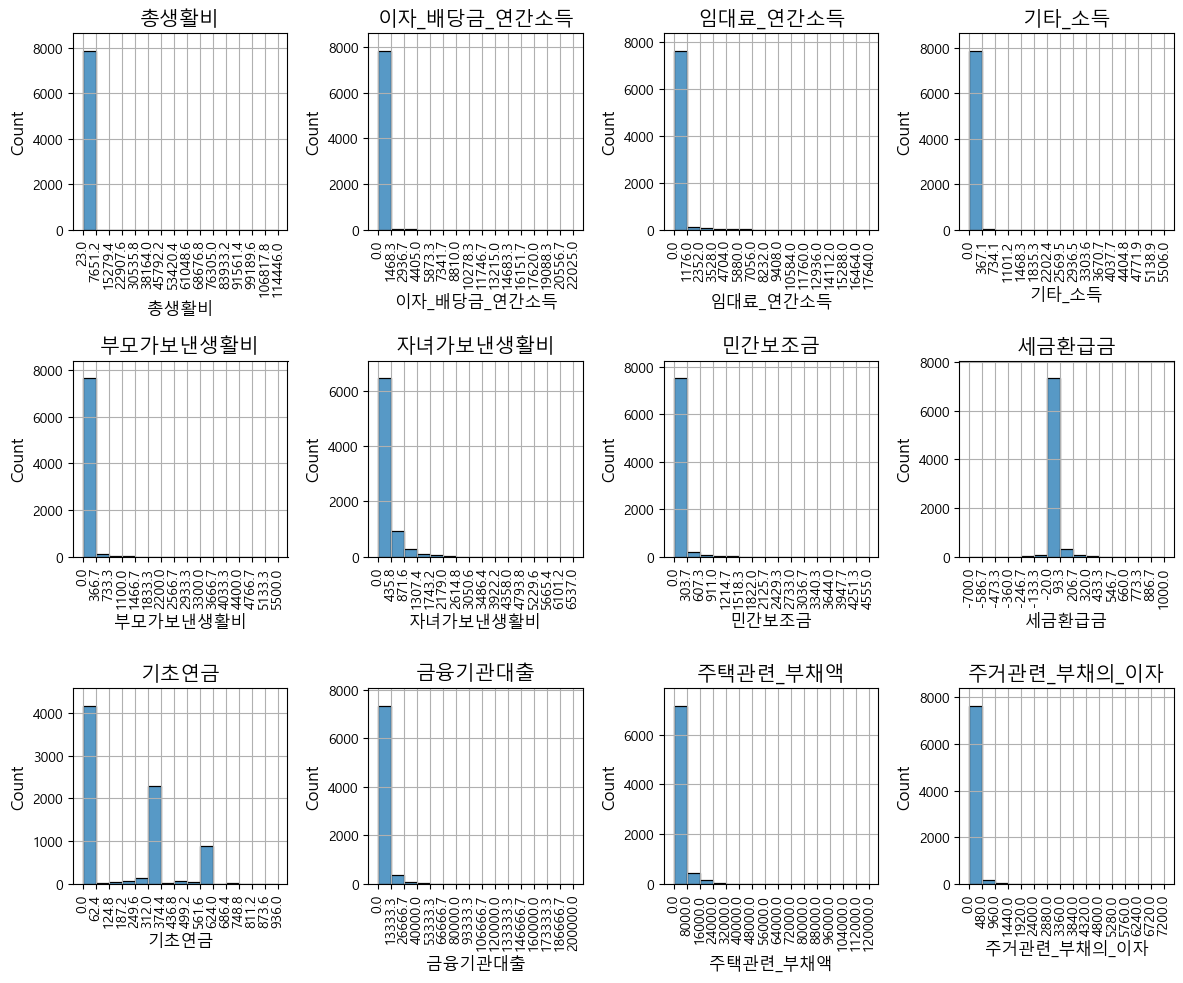

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))  # 3x3 서브플롯 생성

for ax, column in zip(axes.flat, re_df1.columns):
    hist, bins = np.histogram(re_df1[column], bins=15)
    bins2 = np.round(bins, 1)

    sb.histplot(data=re_df1, x=column, bins=15, kde=False, ax=ax) #확률밀도곡선 미표시
    ax.set_title(column)  # 각 subplot의 제목 설정
    ax.set_xticks(bins2)  # x축 눈금 설정
    ax.set_xticklabels(bins2, rotation=90, fontsize=10)  # x축 눈금 라벨 설정 (각도 45도), 폰트 사이즈 설정
    ax.yaxis.set_tick_params(labelsize=10) #y축 폰트 사이즈 설정

    # y축 범위 설정
    y_max = hist.max() + hist.max() * 0.1  # 최대 도수에 10% 여유를 더한 값으로 y축 최댓값 설정
    ax.set_ylim(0, y_max)  # y축 범위 설정
    ax.grid(True) #격자 표시

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

각 컬럼별 최대값 때문에 도수분포표가 비정상적으로 표시되는 것으로 판단

각 컬럼 별 이상치 찾기(1)

그래프 생성을 위해 컬럼 이름, 길이 확인

In [13]:
re_df1.head()
re_df1.columns
len(re_df1.columns)

13

regplot

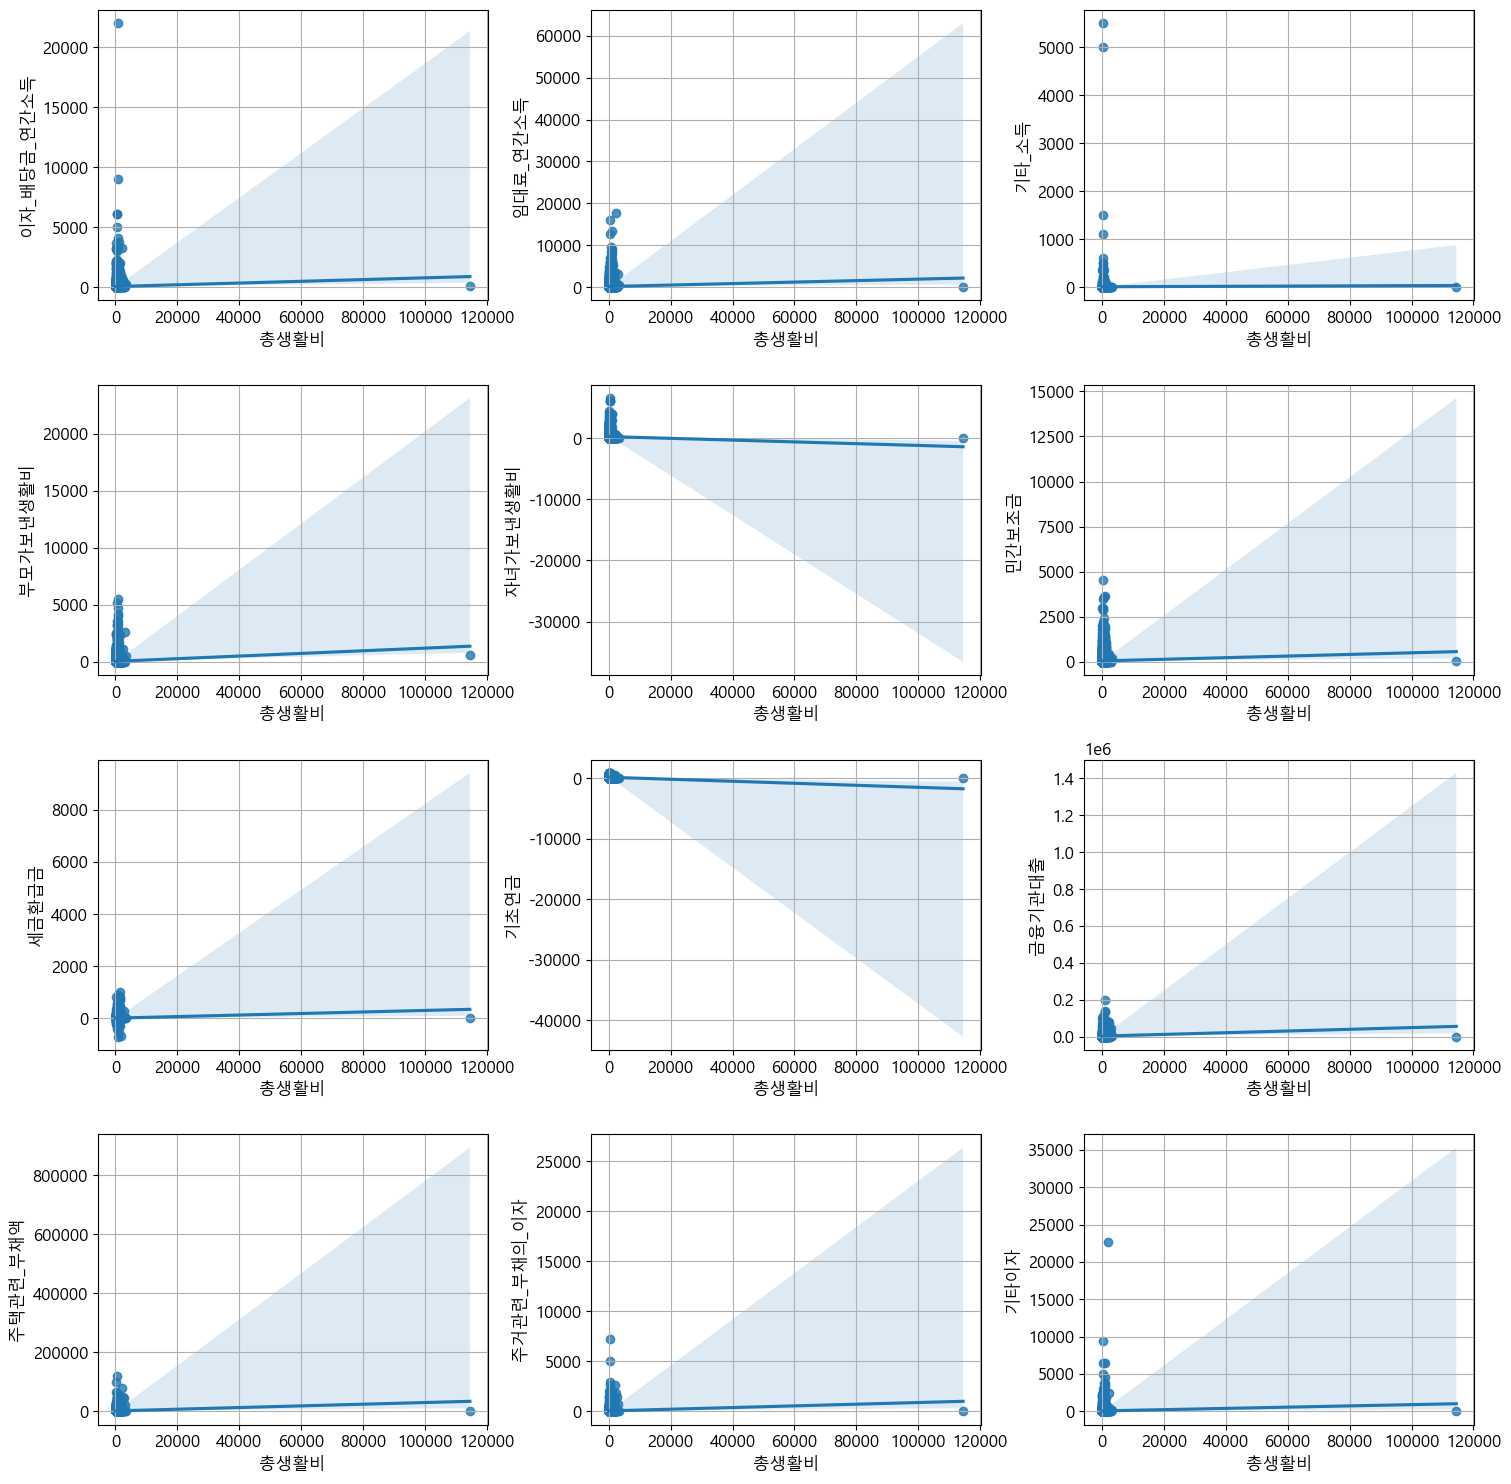

In [14]:
# index = 0부터 시작하면 '총생활비'-'총생활비' 그래프도 그리려고 시도함
columns = list(re_df1.columns)[1:]

# 4행 3열로 12개의 서브플롯 그래프 그리기
fig, ax = plt.subplots(4, 3, figsize=(15, 15))

# 종속변수 설정
dependent_variable = '총생활비'

for i, c in enumerate(range(len(columns))):
    row, col = divmod(i, 3)
    sb.regplot(data=re_df1, x=dependent_variable, y=columns[c], ax=ax[row, col])
    ax[row, col].set_xlabel(dependent_variable)
    ax[row, col].set_ylabel(columns[c])
    ax[row, col].grid()
plt.tight_layout()  # 서브플롯 간격 조정
plt.show()
plt.close()


regplot으로 확인 결과 기초통계량에서 보았던 각 컬럼별 최대값 때문에 정상적인 산점도를 볼 수 없음을 확인

특히, 종속변수이자 x값인 `총생활비`에서 최대값에 의해 나머지 값들이 전부 치우쳐있는 것처럼 표시된다.

각 컬럼 별 이상치 찾기(2)

boxplot

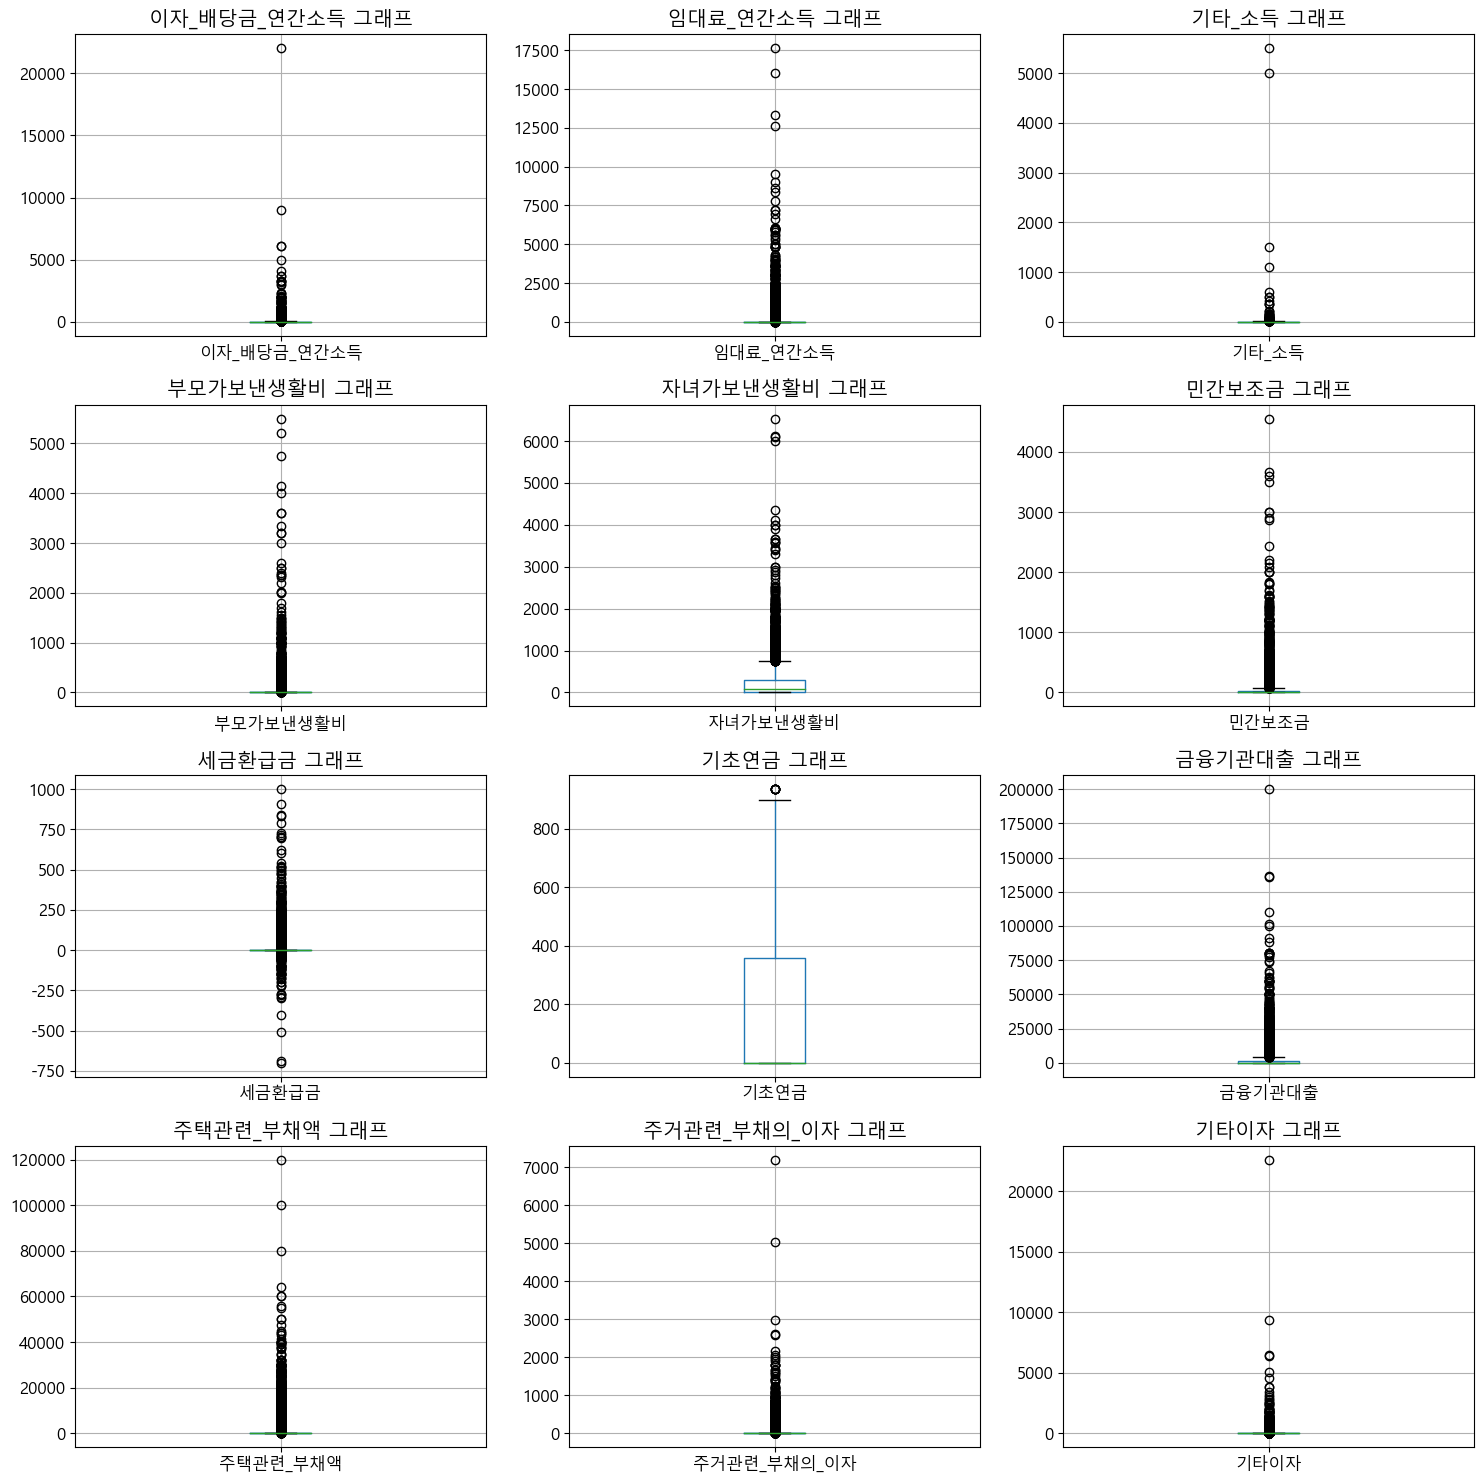

In [15]:
# 4행 2열로 8개의 서브플롯 그래프 그리기
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
for i, c in enumerate(columns):
    row, col = divmod(i, 3)
    re_df1.boxplot(column=c, ax=ax[row, col])
    ax[row, col].set_title(f"{c} 그래프")
    plt.grid(True)
plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

regplot, boxplot 조회 결과

1) x값으로 넣을 종속변수(총생활비)에서 1건만 비정상으로 높은 수치 확인되어 제거하고 진행

2) y값으로 넣을 독립변수들 중 이상치가 각 컬럼에서 발견되어 프로젝트 팀원들 주관적 판단에 의해 제거하기로 결정

3) 이자_배당금_연간소득 상위이상치 2건, 임대료_연간소득 상위이상치 4건,기타_소득 상위이상치 4건,
- 주택관련_부채액 상위이상치 3건, 공적연금_연간소득 상위이상치 7건
- 세금환급금 상위이상치 8건, 금융기관대출 상위이상치 2건, 주거관련_부채의_이자 상위이상치 4건

4) 종속변수,독립변수 포함해서 총35건의 데이터를 제거

In [16]:
re_df1.head()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,275,0.0,0,7.0,0.0,500,360.0,0.0,0,10000,0.0,0,350.0
1,239,0.0,0,7.0,0.0,380,10.0,0.0,360,0,0.0,0,0.0
2,156,0.0,80,7.0,0.0,0,285.0,0.0,360,14000,20500.0,720,0.0
3,541,140.0,0,9.0,0.0,0,20.0,0.0,576,0,0.0,0,0.0
4,85,50.0,0,7.0,0.0,420,3.0,0.0,360,0,0.0,0,0.0


이상치 행 처리

In [17]:
df2=re_df1.query('(총생활비 < 5000) and (이자_배당금_연간소득 < 7000) and (임대료_연간소득 < 11000) and \
                 (기타_소득 < 1000) and (부모가보낸생활비 < 3500) and (자녀가보낸생활비 < 5500) and (민간보조금 < 2500) and \
                 (세금환급금 > -500 and 세금환급금 < 700 ) and (금융기관대출 < 125000) and (주택관련_부채액 < 75000) and \
                 (주거관련_부채의_이자 < 2500) and (기타이자 < 5000)')
df2

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,275,0.0,0,7.0,0.0,500,360.0,0.0,0,10000,0.0,0,350.0
1,239,0.0,0,7.0,0.0,380,10.0,0.0,360,0,0.0,0,0.0
2,156,0.0,80,7.0,0.0,0,285.0,0.0,360,14000,20500.0,720,0.0
3,541,140.0,0,9.0,0.0,0,20.0,0.0,576,0,0.0,0,0.0
4,85,50.0,0,7.0,0.0,420,3.0,0.0,360,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,384,0.0,0,1.0,50.0,0,0.0,70.0,0,3000,3000.0,96,0.0
7861,715,0.0,660,1.0,40.0,0,0.0,90.0,0,40000,0.0,0,1560.0
7862,595,0.0,4000,1.0,40.0,0,0.0,0.0,0,25947,25947.0,67,0.0
7863,562,40.0,0,0.0,0.0,0,0.0,0.0,0,12000,12000.0,360,0.0


In [18]:
# 가구 수가 7830건으로 변경 된것을 알 수 있다.

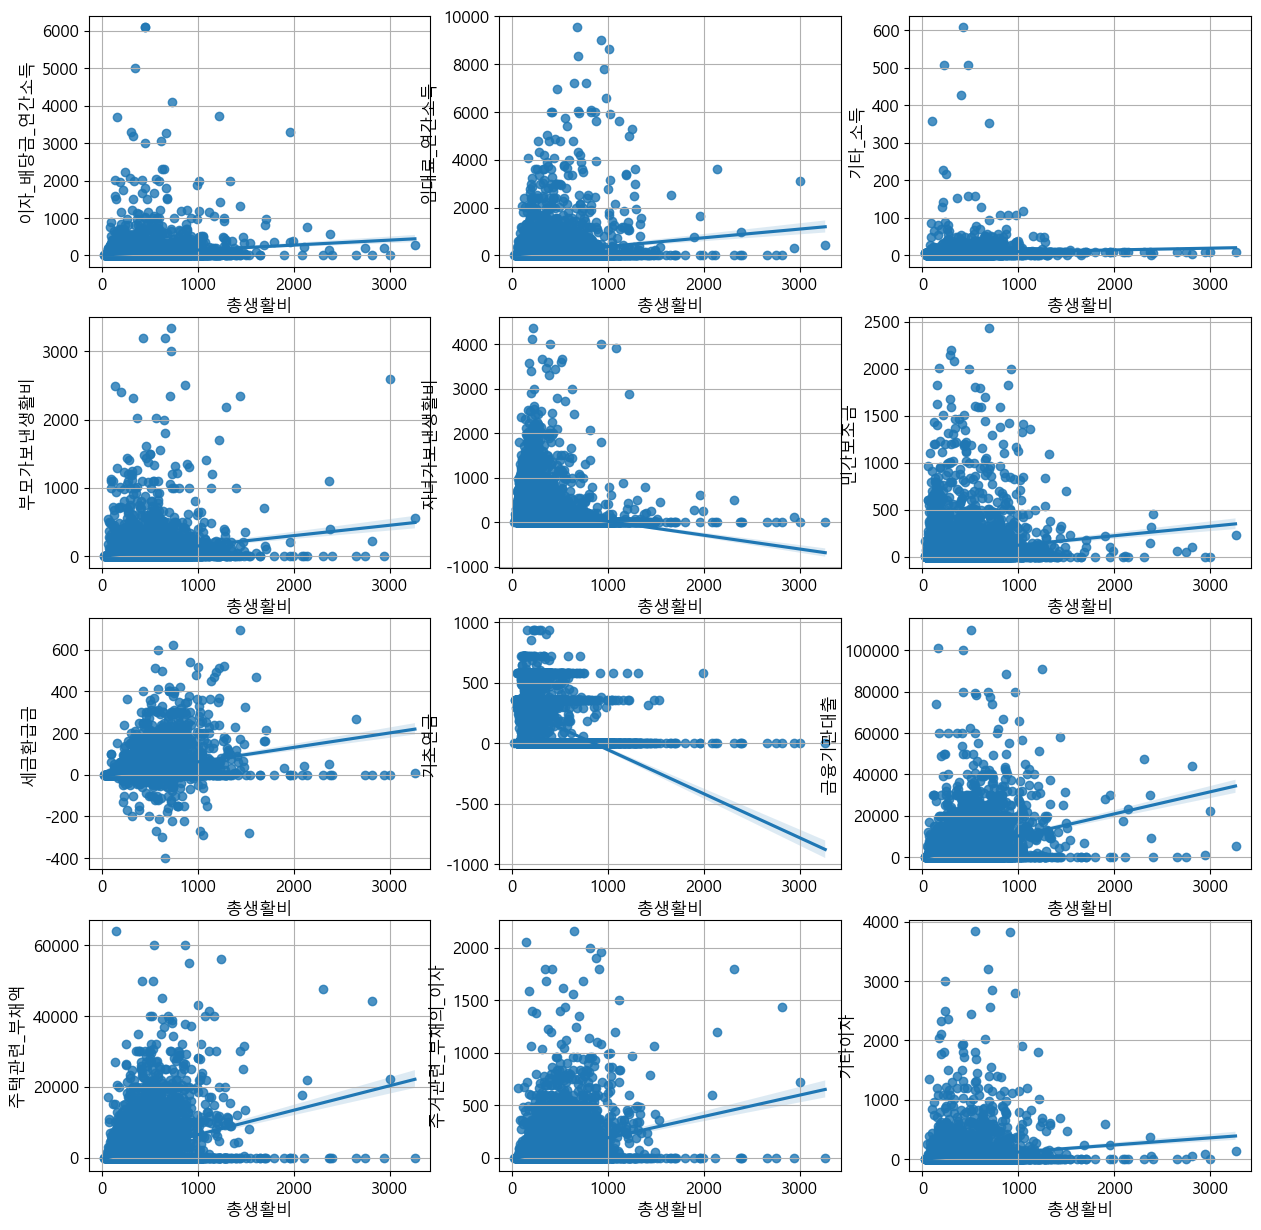

In [19]:
# 이상치 데이터 제거후 추세선이 올라오는지 regplot으로 그래프 재확인하기, boxplot은 재실행해도
# 이상치가 계속 표시될 것이기 때문에 굳이 실행하지 않기로 함

# index = 0부터 시작하면 '총생활비'-'총생활비' 그래프도 그리려고 시도함
columns = list(df2.columns)[1:]

# 4행 2열로 8개의 서브플롯 그래프 그리기
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# 종속변수 설정
dependent_variable = '총생활비'

for i, c in enumerate(columns):
    row, col = divmod(i, 3)
    sb.regplot(data=df2, x=dependent_variable, y=c, ax=ax[row, col])
    ax[row, col].set_xlabel(dependent_variable)
    ax[row, col].set_ylabel(c)
    ax[row, col].grid()

plt.show()
plt.close()

데이터 분포가 이전보다 나아졌는지 히스토그램 그래프로 재확인

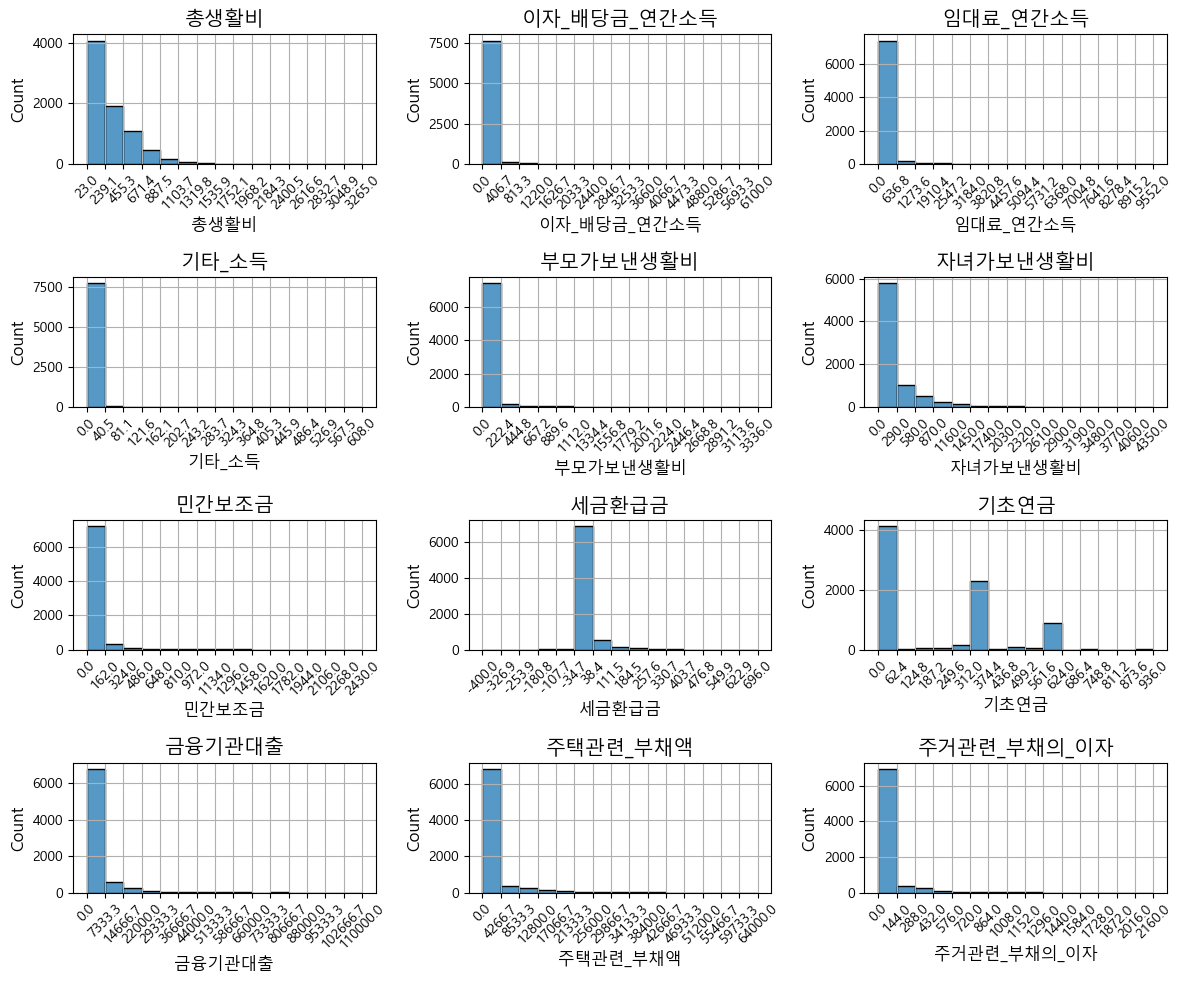

In [20]:
num_bins = 15  # 히스토그램 구간 개수
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))  # 3x3 서브플롯 생성

for ax, column in zip(axes.flat, df2.columns):
    hist, bins = np.histogram(df2[column], bins=num_bins)
    bins2 = np.round(bins, 1)

    sb.histplot(data=df2, x=column, bins=num_bins, kde=False, ax=ax)
    ax.set_title(column)  # 각 subplot의 제목 설정
    ax.set_xticks(bins2)  # x축 눈금 설정
    ax.set_xticklabels(bins2, rotation=45, fontsize=10)  # x축 눈금 라벨 설정 (각도 45도)
    ax.yaxis.set_tick_params(labelsize=10) #y축 폰트 사이즈 설정
    ax.grid(True)

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

이전보다 분포도가 상대적으로 나아졌다고 판단.

신뢰구간 구하기

- 모집단 : 대한민국 전체 가구 
- 모수 : 대한민국 전체 가구 당 해당 엑셀파일의 종속,독립 변수들 수치
- 표본 : 모집단의 일부(ex: 대한민국 전체가구 중 7830가구 선발)
- 통계량 : 표본 7830가구의 월 평균 총생활비

설명

- 해당 데이터의 신뢰구간을 통해 국내 가구 모수(종속변수,독립변수)의 추정값 범위를 추측하는 데에 의미가 있다고 판단.

In [21]:
# df2Col = list(df2.columns)
# # df2Col
# for cc in df2Col:
#     print("%s 신뢰구간95%%"%cc)
#     getConfidenceInterval(df2["%s"%cc])
#     # print('\n')

In [22]:
# #신뢰구간을 그래프로 시각화 해보기


# # 변수명 리스트 생성
# variables = df2.columns

# # 각 변수별 x, y 범위 정의
# x_ranges = {
#     '총생활비': (-200,400),
#     '이자_배당금_연간소득': (-150,150),
#     '임대료_연간소득': (-200,200),
#     '기타_소득': (-30,30),
#     '세금환급금': (-30,30),
#     '금융기관대출': (-4000,4000),
#     '주거관련_부채의_이자': (-100,100),
#     '주택관련_부채액': (-3000,3000),
#     '공적연금_연간소득': (-400,400),
# }

# y_ranges = {
#     '총생활비': (0,0.005),
#     '이자_배당금_연간소득': (0,0.01),
#     '임대료_연간소득': (0,0.005),
#     '기타_소득': (0,0.12),
#     '세금환급금': (0,0.05),
#     '금융기관대출': (0,0.0004),
#     '주거관련_부채의_이자': (0,0.02),
#     '주택관련_부채액': (0,0.0005),
#     '공적연금_연간소득': (0,0.003),
# }

# # 신뢰구간 계산
# confidence_level = 0.95
# confidence_intervals = {}  # 각 변수별 신뢰구간을 저장할 딕셔너리

# for var in variables:
#     sample = df2[var]
#     n = len(sample)
#     sample_mean = sample.mean()
#     sample_std = sample.std(ddof=1)
#     std_error = sample_std / sqrt(n)
    
#     t_value = t.ppf((1 + confidence_level) / 2, df=n-1)
#     margin_of_error = t_value * std_error
    
#     lower_bound = sample_mean - margin_of_error
#     upper_bound = sample_mean + margin_of_error
    
#     confidence_intervals[var] = (lower_bound, upper_bound)

# # subplot 설정
# num_rows = (len(variables) + 2) // 3  # 3열로 subplot 배치
# fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))

# # 신뢰구간 시각화
# for ax, var in zip(axes.flat, variables):
#     cmin, cmax = confidence_intervals[var]  # 하한과 상한
    
#     sb.kdeplot(data=df2, x=var, ax=ax)
#     sb.lineplot(x=[cmin, cmin], y=[0, 0.1], color='red', ax=ax)
#     sb.lineplot(x=[cmax, cmax], y=[0, 0.1], color='blue', ax=ax)
#     ax.set_title(f'{var} 신뢰구간 95%')
#     ax.set_xlim(x_ranges[var])  # x축 범위 확장
#     ax.set_ylim(y_ranges[var])  # y축 범위 설정
#     ax.grid(True)  # 격자 표시

# plt.tight_layout()  # 서브플롯 간격 조정
# plt.show()

히트맵 그래프로 요인들간에 상관관계 있는지 확인

In [23]:
# 히트맴 생성을 위한 컬럼 추출
cnames = []
dtypes = df2.dtypes

for i, v in enumerate(dtypes):
    if v != 'category':
        # print(dtypes.index[i], dtypes[i])
        cnames.append(dtypes.index[i])
        
print(cnames)

['총생활비', '이자_배당금_연간소득', '임대료_연간소득', '기타_소득', '부모가보낸생활비', '자녀가보낸생활비', '민간보조금', '세금환급금', '기초연금', '금융기관대출', '주택관련_부채액', '주거관련_부채의_이자', '기타이자']


In [24]:
corr = df2.corr(method='pearson')
corr.head()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
총생활비,1.000000,0.159466,0.177246,0.081593,0.231900,-0.211401,0.156574,0.356784,-0.439711,0.377477,0.359309,0.338586,0.171752
이자_배당금_연간소득,0.159466,1.000000,0.101627,0.021361,0.004932,-0.009250,0.031200,0.047240,-0.110494,0.047993,0.018541,0.011249,0.008893
임대료_연간소득,0.177246,0.101627,1.000000,0.017209,-0.004815,0.003294,-0.004560,-0.001628,-0.116562,0.183368,0.064415,0.077338,0.201364
기타_소득,0.081593,0.021361,0.017209,1.000000,0.013932,-0.012817,0.019874,0.053930,-0.055660,0.031098,0.028100,0.018855,0.022710
부모가보낸생활비,0.231900,0.004932,-0.004815,0.013932,1.000000,-0.135769,0.044392,0.134110,-0.199569,0.121196,0.147821,0.132952,0.024628


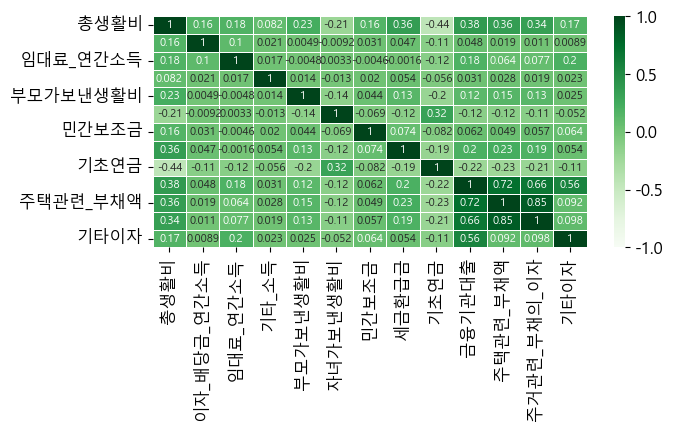

In [25]:
plt.rcParams["figure.figsize"] = (7,3)

sb.heatmap(corr,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상(Greys,Purples,Blues,Greens,Oranges,Reds,OrRd,PuRd,RdPu,BuPu,GnBu,PuBu,YlGnBu,PuBuGn,BuGn,YlGn)
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5, #구분선 굵기
           annot_kws={"size": 8}  # 글자 크기 조정
)

plt.show()
plt.close()

회귀분석에 필요한 요인들을 선정하기 위해 `주성분분석(pca)`를 시행

데이터 표준화-정규화(scaling)

In [26]:
x_train_std_df, y_train_std_df = helper.scalling(df2[cnames], '총생활비')
x_train_std_df.head()

,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,-0.230422,-0.22104,0.018517,-0.239008,0.694893,1.798621,-0.266378,-0.884981,0.951268,-0.333505,-0.314055,1.675940
1,-0.230422,-0.22104,0.018517,-0.239008,0.387437,-0.258938,-0.266378,0.752638,-0.376656,-0.333505,-0.314055,-0.216164
2,-0.230422,-0.07476,0.018517,-0.239008,-0.586173,1.357716,-0.266378,0.752638,1.482437,3.669628,4.187689,-0.216164
3,0.400758,-0.22104,0.150349,-0.239008,-0.586173,-0.200150,-0.266378,1.735208,-0.376656,-0.333505,-0.314055,-0.216164
4,-0.005000,-0.22104,0.018517,-0.239008,0.489922,-0.300089,-0.266378,0.752638,-0.376656,-0.333505,-0.314055,-0.216164


표준화 결과를 활용하여 주성분분석(PCA) 수행 진행

In [27]:
model = pca()
fit = model.fit_transform(x_train_std_df)
topfeat = fit['topfeat']
topfeat

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,금융기관대출,0.510084,best
1,PC2,자녀가보낸생활비,0.509770,best
2,PC3,임대료_연간소득,0.558318,best
3,PC4,이자_배당금_연간소득,0.683695,best
4,PC5,기타_소득,0.717333,best
5,PC6,민간보조금,-0.755346,best
6,PC7,부모가보낸생활비,0.702248,best
7,PC8,세금환급금,0.738484,best
8,PC9,임대료_연간소득,-0.684041,best
9,PC10,기초연금,-0.768442,best


주성분(PCA 분석에서 best 요소) 추출

In [28]:
best = topfeat.query("type=='best'")
best_names = list(set(list(best['feature'])))
best_names

['이자_배당금_연간소득',
 '기타_소득',
 '민간보조금',
 '세금환급금',
 '기초연금',
 '금융기관대출',
 '자녀가보낸생활비',
 '부모가보낸생활비',
 '임대료_연간소득']

주성분과 종속변수를 결합

In [29]:
target_names = best_names + ['총생활비']
target_names

['이자_배당금_연간소득',
 '기타_소득',
 '민간보조금',
 '세금환급금',
 '기초연금',
 '금융기관대출',
 '자녀가보낸생활비',
 '부모가보낸생활비',
 '임대료_연간소득',
 '총생활비']

In [30]:
merge_df = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
df3 = merge_df.filter(target_names)
df3.head()

,이자_배당금_연간소득,기타_소득,민간보조금,세금환급금,기초연금,금융기관대출,자녀가보낸생활비,부모가보낸생활비,임대료_연간소득,총생활비
0,-0.230422,0.018517,1.798621,-0.266378,-0.884981,0.951268,0.694893,-0.239008,-0.22104,-0.140863
1,-0.230422,0.018517,-0.258938,-0.266378,0.752638,-0.376656,0.387437,-0.239008,-0.22104,-0.276086
2,-0.230422,0.018517,1.357716,-0.266378,0.752638,1.482437,-0.586173,-0.239008,-0.07476,-0.587851
3,0.400758,0.150349,-0.200150,-0.266378,1.735208,-0.376656,-0.586173,-0.239008,-0.22104,0.858285
4,-0.005000,0.018517,-0.300089,-0.266378,0.752638,-0.376656,0.489922,-0.239008,-0.22104,-0.854541


- 종속변수
> 총생활비

- 독립변수
> '이자_배당금_연간소득', '임대료_연간소득','기타_소득', '세금환급금', '금융기관대출'</br>
> '주거관련_부채의_이자', '주택관련_부채액', '공적연금_연간소득'

- 불로소득에 포함되는 변수
> '이자_배당금_연간소득', '임대료_연간소득', '공적연금_연간소득', '세금환급금'

- 부채에 포함되는 변수
> '금융기관대출', '주거관련_부채의_이자', '주택관련_부채액'

회귀분석

In [31]:
# 종속변수 : 총생활비, 독립변수 : 주성분
ols_result = helper.myOls(df3, y='총생활비', x=best_names)
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                   총생활비   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     511.9
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:11:38   Log-Likelihood:                -9272.1
No. Observations:                7812   AIC:                         1.856e+04
Df Residuals:                    7802   BIC:                         1.863e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.469e-17      0.009   3.86e-15      

결과 보고

In [32]:
ols_result.table

B   표준오차  β         t   유의확률       VIF
종속변수 독립변수                                                     
총생활비 이자_배당금_연간소득   0.0930  0.009  0   10.242*  0.000  1.036920
     기타_소득         0.0395  0.009  0    4.383*  0.000  1.008177
     민간보조금         0.0919  0.009  0   10.161*  0.000  1.028059
     세금환급금         0.2252  0.009  0   24.073*  0.000  1.166447
     기초연금         -0.2785  0.010  0  -27.990*  0.000  1.351896
     금융기관대출        0.2230  0.010  0   23.445*  0.000  1.201280
     자녀가보낸생활비     -0.0470  0.010  0   -4.932*  0.000  1.132548
     부모가보낸생활비      0.1081  0.009  0   11.676*  0.000  1.081968
     임대료_연간소득      0.0952  0.009  0   10.322*  0.000  1.070719

In [33]:
print(ols_result.result, end="\n\n")
print(ols_result.goodness, end="\n\n")
for i in ols_result.varstr:
    print(i)

𝑅(0.371), 𝑅^2(0.371), 𝐹(511.9), 유의확률(0.00), Durbin-Watson(1.871)

총생활비에 대하여 이자_배당금_연간소득,기타_소득,민간보조금,세금환급금,기초연금,금융기관대출,자녀가보낸생활비,부모가보낸생활비,임대료_연간소득로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(9,7802) = 511.9, p < 0.05).

이자_배당금_연간소득의 회귀계수는 0.0930(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.
기타_소득의 회귀계수는 0.0395(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.
민간보조금의 회귀계수는 0.0919(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.
세금환급금의 회귀계수는 0.2252(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.
기초연금의 회귀계수는 -0.2785(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.
금융기관대출의 회귀계수는 0.2230(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.
자녀가보낸생활비의 회귀계수는 -0.0470(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.
부모가보낸생활비의 회귀계수는 0.1081(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.
임대료_연간소득의 회귀계수는 0.0952(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.


In [34]:
sdf = DataFrame({
    "관측값": df3['총생활비'],
    "예측값": ols_result.fit.fittedvalues,
    "잔차": ols_result.fit.resid,
    "zscore": stats.zscore(ols_result.fit.fittedvalues)
})

sdf

,관측값,예측값,잔차,zscore
0,-0.140863,0.463546,-0.604409,0.760744
1,-0.276086,-0.463168,0.187081,-0.760124
2,-0.587851,0.159598,-0.747449,0.261924
3,0.858285,-0.621700,1.479985,-1.020297
4,-0.854541,-0.450806,-0.403735,-0.739837
...,...,...,...,...
7807,0.268562,0.441686,-0.173124,0.724869
7808,1.511864,1.732789,-0.220925,2.843752
7809,1.061120,1.507214,-0.446094,2.473552
7810,0.937166,0.387155,0.550010,0.635376


`Q-Q Plot`을 사용한 `잔차 정규성 확인`

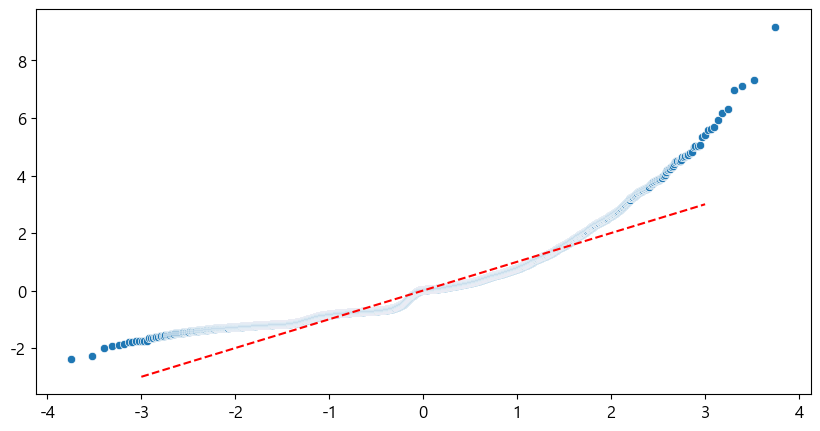

In [35]:
(x, y), _ = stats.probplot(sdf['zscore'])

plt.figure(figsize=(10, 5))
sb.scatterplot(x=x, y=y)
sb.lineplot(x=[-3, 3], y=[-3, 3], color='red', linestyle='--')
plt.show()
plt.close()

정규분포 가정 구하기(1)

왜도

 분포의 비대칭도.

| 구분 | 내용 |
|---|---|
| 정규분포 | $왜도=0$ |
| 왼쪽으로 치우침 | $왜도 > 0$ |
| 오른쪽으로 치우침 | $왜도 < 0$ |

In [36]:
# 왜도 구하기, 종속변수인 총생활비는 제외
# 왜냐하면 종속변수는 분석의 대상이 되는 특별한 변수이며, 종속변수의 분포 특성을
# 파악하는 것은 회귀 분석 등과 같은 다른 분석 기법으로 처리될 수 있기 때문
# for column in df2.columns:
#     if column != '총생활비':  # '총생활비' 컬럼은 제외
#         skewness = skew(df2[column])
#         print(f"{column}의 정규분포 왜도: {skewness}")
#         print("================================")

설명

결과에서 나온 값들은 각각의 독립변수 분포가 정규분포를 따르지 않음을 나타낸다.

각 변수의 왜도값이 0보다 크다는 의미는 왼쪽으로 치우져저 있다는 것을 의미함.

다만, 기초통계량을 보면 알 수 있듯이 각 변수별 수치값의 편차가 워낙 크고 최소값이 "0"인 경우가 많음.

또한 해당 데이터는 국민 조사를 기반으로 한 실제조사 데이터이기 때문에 정규분포를 따르지 않을 수 있음을 염두해야 할 것으로 판단됨.

정규분포 가정 구하기(2)

잔차의 첨도

 확률분포의 뾰족한 정도.

Fisher = True 

   - 첨도 기준이 Fisher (normal ==> 0.0) 이다.
   - 정규분포의 첨도 = 0이다. 


| 구분 | 내용 |
|---|---|
| 정규분포 | $첨도 = 0$ |
| 위로 뾰족함 | $첨도 > 0$ |
| 아래로 뾰족함 | $첨도 < 0$ |

In [37]:
#첨도 구하기.종속변수인 총생활비는 제외
#이유는 상기 왜도와 같음

# for column in df2.columns:
#     if column != '총생활비':  # '총생활비' 컬럼은 제외
#         kurtosisness = kurtosis(df2[column],fisher=True)
#         print(f"{column}의 정규분포 첨도: {kurtosisness}")
#         print("================================")

설명

결과에서 나온 값들은 각각의 독립변수 분포가 정규분포를 따르지 않음을 나타낸다.

각 변수의 첨도값이 0보다 크다는 의미는 위쪽으로 뾰족하다는 것을 의미함.

다만 기초통계량을 보면 알 수 있듯이 각 변수별 수치값의 편차가 워낙 크고 최소값이 "0"인 경우가 많음

또한 해당 데이터는 국민 조사를 기반으로 한 실제조사 데이터이기 때문에 정규분포를 따르지 않을 수 있음을 염두해야 할 것으로 판단됨